## Partie Modelisation

In [1]:
import pandas as pd  
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

# label encoder  
# rgb = onehotencoder
# pearson   (2continues  ou catégroriellesonehotencoded)
# correlation : 2 continues             Tableau de contingence
# continu + categorielle ANOVA  (continu / discrete)
# 2 categorielles : chi2


In [2]:
# Étape 1 : Charger les données
file_path = "/home/antoine/Documents/Projets_DEV_IA/Brief 2/data/4072eb5e-e963-4a17-a794-3ea028d0a9c4.csv"
data = pd.read_csv(file_path)
df = pd.DataFrame(data)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### données catégorielles

In [3]:
# Préparation des données
# Données qualitatives catégorielles
# Normalisation
data["homme"] = data["sex"].apply(lambda x: 1 if x == "male" else 0)
data["femme"] = data["sex"].apply(lambda x: 1 if x == "female" else 0)
data["southwest"] = data["region"].apply(lambda x: 1 if x == "southwest" else 0)
data["northwest"] = data["region"].apply(lambda x: 1 if x == "northwest" else 0)
data["northeast"] = data["region"].apply(lambda x: 1 if x == "northeast" else 0)
data["southeast"] = data["region"].apply(lambda x: 1 if x == "southeast" else 0)
# data["fumeur"] = data["smoker"].apply(lambda x: 1 if x == "yes" else 0)
# data["non fumeur"] = data["smoker"].apply(lambda x: 1 if x == "no" else 0)
data["smoker"] =  data["smoker"].replace(['yes', 'no'], [0, 1])
data.drop(['sex'], axis = 1)
data.head()





/tmp/ipykernel_58212/3697851183.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["smoker"] =  data["smoker"].replace(['yes', 'no'], [0, 1])


,age,sex,bmi,children,smoker,region,charges,homme,femme,southwest,northwest,northeast,southeast
0,19,female,27.900,0,0,southwest,16884.92400,0,1,1,0,0,0
1,18,male,33.770,1,1,southeast,1725.55230,1,0,0,0,0,1
2,28,male,33.000,3,1,southeast,4449.46200,1,0,0,0,0,1
3,33,male,22.705,0,1,northwest,21984.47061,1,0,0,1,0,0
4,32,male,28.880,0,1,northwest,3866.85520,1,0,0,1,0,0


In [4]:
# Normalisation

def normalize_data(data):
    print(data.shape[1])
    for i in range(0,data.shape[1]):
        mu = np.mean(data.iloc[1:,i])
        std = np.std(data.iloc[1:,i])
        data.iloc[:,i] = ((data.iloc[:,i] - mu)/std)
    return data

data_norm= normalize_data(data.select_dtypes(include=['number']))
data_norm.head()

11


/tmp/ipykernel_58212/714065684.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0      -1.440418
1      -1.511647
2      -0.799350
3      -0.443201
4      -0.514431
          ...   
1333    0.767704
1334   -1.511647
1335   -1.511647
1336   -1.297958
1337    1.551231
Name: age, Length: 1338, dtype: float64' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.iloc[:,i] = ((data.iloc[:,i] - mu)/std)
/tmp/ipykernel_58212/714065684.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0      -0.909234
1      -0.079442
2       1.580143
3      -0.909234
4      -0.909234
          ...   
1333    1.580143
1334   -0.909234
1335   -0.909234
1336   -0.909234
1337   -0.909234
Name: children, Length: 1338, dtype: float64' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.i

,age,bmi,children,smoker,charges,homme,femme,southwest,northwest,northeast,southeast
0,-1.440418,-0.453524,-0.909234,-1.974192,0.298705,-1.011283,1.011283,1.768203,-0.566698,-0.565546,-0.611638
1,-1.511647,0.509131,-0.079442,0.506536,-0.953141,0.988843,-0.988843,-0.565546,-0.566698,-0.565546,1.634955
2,-0.799350,0.382854,1.580143,0.506536,-0.728203,0.988843,-0.988843,-0.565546,-0.566698,-0.565546,1.634955
3,-0.443201,-1.305482,-0.909234,0.506536,0.719821,0.988843,-0.988843,-0.565546,1.764609,-0.565546,-0.611638
4,-0.514431,-0.292808,-0.909234,0.506536,-0.776314,0.988843,-0.988843,-0.565546,1.764609,-0.565546,-0.611638


### données quantitatives

In [5]:
# Étape 3 : Préparer les variables
# Définir les variables indépendantes (features) et la variable dépendante (target)

y = data["charges"]  # Variable cible
X = data[["bmi", "age","smoker"]]  # Variables explicatives

In [6]:
# Étape 4 : Diviser les données en ensembles d'entraînement et de test
# 80% pour l'entraînement, 20% pour le test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

# Afficher les dimensions des ensembles pour confirmation
print("\nDimensions des ensembles :")
print(f"Entraînement : X_train {X_train.shape}, y_train {y_train.shape}")
print(f"Test : X_test {X_test.shape}, y_test {y_test.shape}")
print(X_train)
print()


Dimensions des ensembles :
Entraînement : X_train (1070, 3), y_train (1070,)
Test : X_test (268, 3), y_test (268,)
         bmi  age  smoker
560   19.950   46       1
1285  24.320   47       1
1142  24.860   52       1
969   34.320   39       1
486   21.470   54       1
...      ...  ...     ...
1095  31.350   18       1
1130  23.870   39       1
1294  25.175   58       1
860   47.600   37       0
1126  29.900   55       1

[1070 rows x 3 columns]



### On réprésente maintenant graphiquement les données d'entrainement et les données test

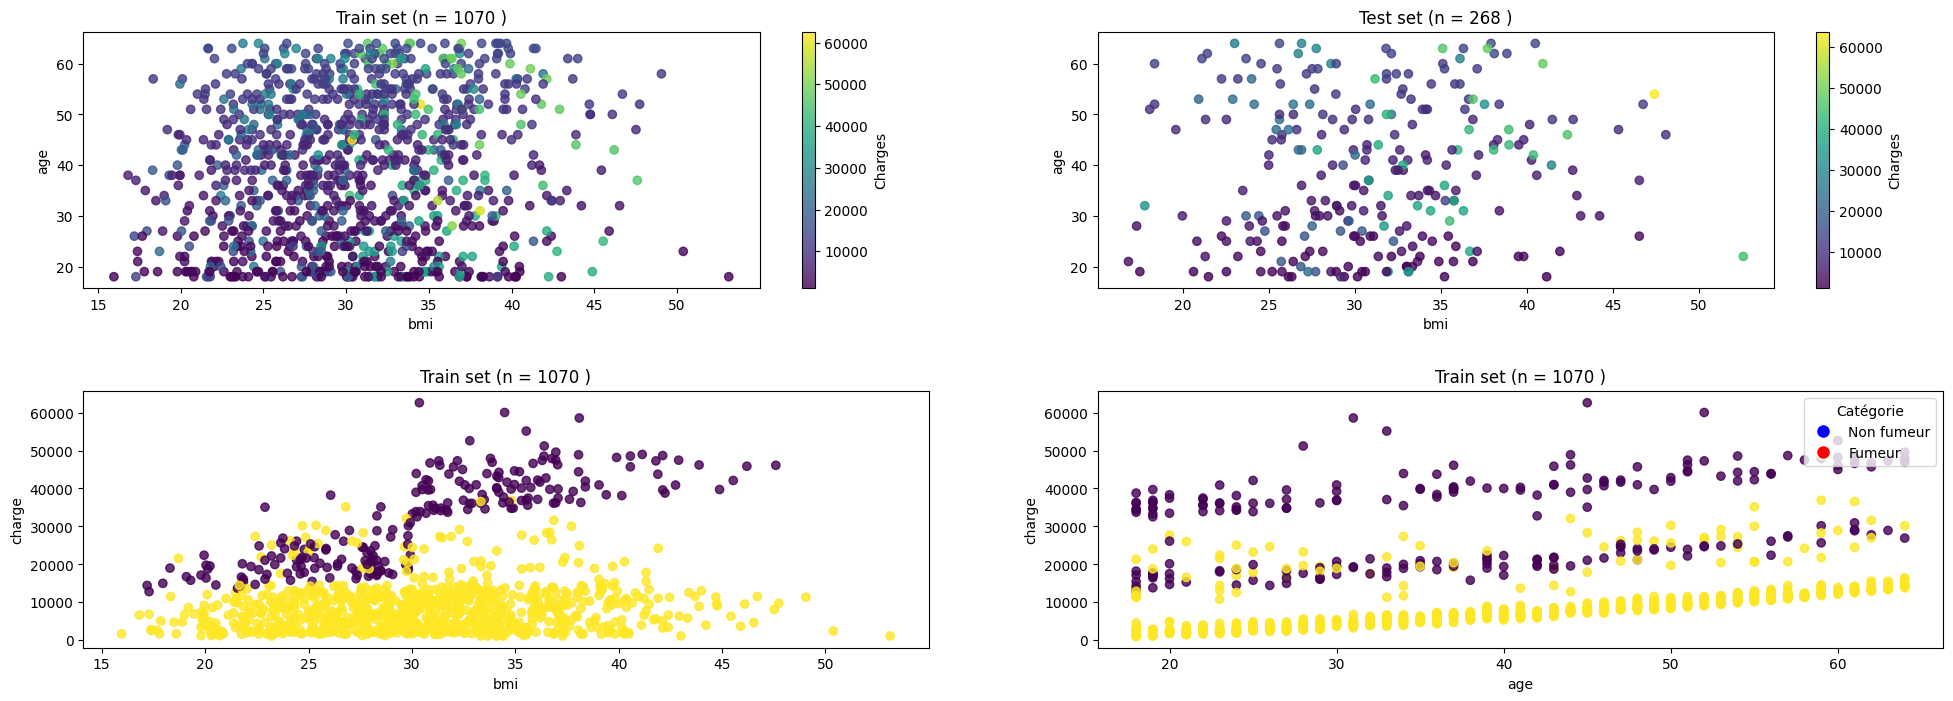

In [7]:
X_train_np = X_train.to_numpy()  
y_train_np = y_train.to_numpy()
X_test_np  = X_test.to_numpy()  
y_test_np  = y_test.to_numpy()

plt.figure(figsize = (24,8))
plt.subplot(221)
sc = plt.scatter(X_train_np[:,0],X_train_np[:,1], c = y_train_np, alpha = 0.8)
plt.title(f'Train set (n = {X_train.shape[0]} )')
plt.xlabel('bmi')
plt.ylabel('age')
cbar = plt.colorbar(sc)
cbar.set_label('Charges')

plt.subplot(222)
sc = plt.scatter(X_test_np[:,0],X_test_np[:,1], c = y_test_np, alpha = 0.8)
plt.title(f'Test set (n = {X_test.shape[0]} )')
plt.xlabel('bmi')
plt.ylabel('age')
cbar = plt.colorbar(sc)
cbar.set_label('Charges')

plt.subplot(223)
sc = plt.scatter(X_train_np[:,0],y_train_np, c = X_train_np[:,2], alpha = 0.8)
plt.title(f'Train set (n = {X_train.shape[0]} )')
plt.xlabel('bmi')
plt.ylabel('charge')


plt.subplot(224)
sc = plt.scatter(X_train_np[:,1],y_train_np, c = X_train_np[:,2], alpha = 0.8)
plt.title(f'Train set (n = {X_train.shape[0]} )')
plt.xlabel('age')
plt.ylabel('charge')


# Ajouter une légende pour la variable binaire (smoker)
handles = [plt.Line2D([0], [0], marker='o', color='w', label='Non fumeur', 
                      markerfacecolor='blue', markersize=10),
           plt.Line2D([0], [0], marker='o', color='w', label='Fumeur', 
                      markerfacecolor='red', markersize=10)]
plt.legend(title='Catégorie', handles=handles, loc='upper right')

# Ajustement des espaces entre les graphiques
plt.subplots_adjust(hspace=0.4)

plt.show()

In [8]:
# Étape 5 : Construire et entraîner le modèle de régression linéaire
# Initialiser le modèle
model = linear_model.LinearRegression()

# Entraîner le modèle sur les données d'entraînement
model.fit(X_train, y_train)

# Evaluation du modèle 
print(f"Evaluation du modèle : {model.score(X,y)}")

# Afficher les coefficients du modèle
print("\nCoefficients du modèle :")
print(f"Intercept : {model.intercept_}")
print(f"Coefficients : {model.coef_} (correspondant à bmi, âge)")



Evaluation du modèle : 0.7474314788759475

Coefficients du modèle :
Intercept : 11967.569512072138
Coefficients : [   326.45023215    259.41020462 -23675.37184666] (correspondant à bmi, âge)


### Cross Validation

In [17]:
cdf = pd.DataFrame(model.coef_, X.columns, columns=['Coefficients'])
print(cdf)

        Coefficients
bmi       326.450232
age       259.410205
smoker -23675.371847


In [29]:


from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

viz = FeatureImportances(model, labels=X_train.columns)
viz.fit(X_train, y_train)
viz.show()

ModuleNotFoundError: No module named 'distutils'

<Axes: >

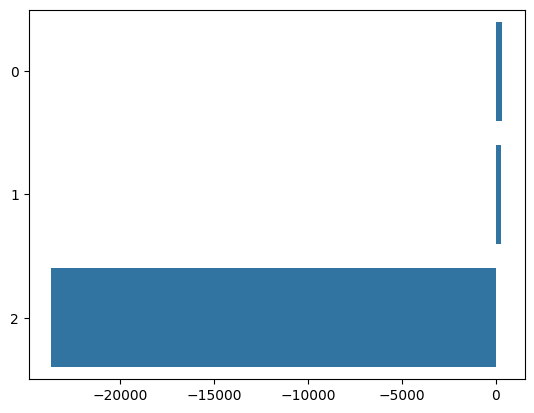

In [30]:
import seaborn as sns
sns.barplot(model.coef_,orient='h')

/tmp/ipykernel_58212/2524229184.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=X.columns, y=model.coef_, palette='Paired')


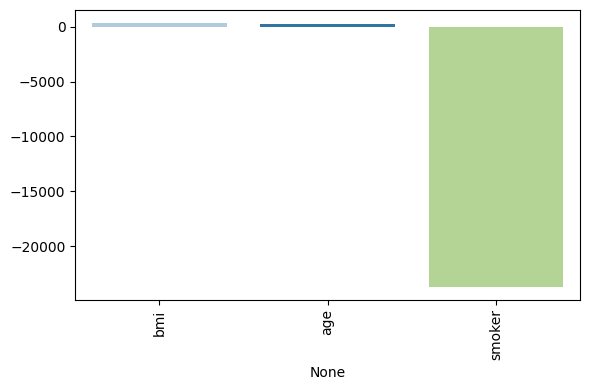

In [21]:
import seaborn as sns

plt.figure(figsize=(6,4)) 
sns.barplot(x=X.columns, y=model.coef_, palette='Paired') 

plt.xticks(rotation=90) 
plt.tight_layout(); 

In [15]:

print(model.coef_)
print(model.get_feature_names_out())

[   326.45023215    259.41020462 -23675.37184666]


AttributeError: 'LinearRegression' object has no attribute 'get_feature_names_out'

In [9]:
cross_val_score(model, X_train, y_train, cv = 5).mean()#, scoring = 'accuracy')

np.float64(0.733137278680342)

In [10]:
# Evcalutaion du modele
#
model.score(X,y)

0.7474314788759475

In [11]:
# Étape 6 : Évaluer les performances du modèle
y_pred = model.predict(X_test)

# Calcul des métriques d'évaluation
mse = mean_squared_error(y_test, y_pred)  # Erreur quadratique moyenne
r2  = r2_score(y_test, y_pred)  # Coefficient de détermination (R²)

# Résultats : 
print("\nÉvaluation du modèle :")
print(f"Mean Squared Error (MSE) : {mse}")
print(f"Root Mean Squared Error (RMSE) : {np.sqrt(mse)}")
print(f"Coefficient of Determination (R²) : {r2}")

NameError: name 'mean_squared_error' is not defined

In [ ]:
# Étape 7 : Faire des prédictions sur de nouvelles données
# Exemple de prédiction pour un individu de bmi 15, et de 25 ans
new_data = [[15,25,0,1]]  # Nouvelle observation
predicted_price = model.predict(new_data)

print("\nPrédiction pour un individu d'imc 15 et de 25 ans :")
print(f"Prédiction prime d'assurance : {predicted_price[0]:.2f} (en milliers d'euros)")
print('-'*50)


Prédiction pour un individu d'imc 15 et de 25 ans :
Prédiction prime d'assurance : -834.45 (en milliers d'euros)
--------------------------------------------------


/home/antoine/Documents/Projets_DEV_IA/Brief 2/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
# Utiliser Lasso 
Ridge 
ElasticNEt